In [2]:
#!pip install --upgrade numpy
!pip3 install --upgrade diffusers
!pip install invisible_watermark transformers accelerate safetensors
# !pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121
# !pip3 install -U huggingface_hub
# !pip install pip-review
# !pip-review --auto

  Obtaining dependency information for diffusers from https://files.pythonhosted.org/packages/aa/0b/af1dd4b355accf28fa413d93c3b7df2c25922ebc3435eecc56818a3f8c1e/diffusers-0.25.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.1 MB/s eta 0:00:00a 0:00:01
  Obtaining dependency information for invisible_watermark from https://files.pythonhosted.org/packages/2b/57/18b5a914f6d7994dd349252873169e946dc824328e9a37fd15ed836deedc/invisible_watermark-0.2.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.6 MB/s eta 0:00:00a 0:00:01


In [4]:
import torch
torch.cuda.is_available()

True

In [21]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = '0,1,2,3'
net = torch.nn.DataParallel(model, device_ids=[0])

NameError: name 'model' is not defined

In [5]:
!nvidia-smi

Tue Jan  2 03:03:42 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.161.03   Driver Version: 470.161.03   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8     9W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  Tesla T4            Off  | 00000000:00:05.0 Off |                    0 |
| N/A   

In [18]:
from diffusers.utils import load_image
from diffusers import AutoPipelineForText2Image ,AutoPipelineForImage2Image

In [15]:
# del pipeline
torch.cuda.empty_cache()

In [1]:
pipeline = AutoPipelineForText2Image.from_pretrained(
    "/kaggle/input/stable-diffusion-xl/pytorch/refiner-1-0/1",
    torch_dtype=torch.float16, variant="fp16", use_safetensors=True,
    requires_safety_checker=False,
    safety_checker=None,
).to("cuda")

NameError: name 'AutoPipelineForText2Image' is not defined

In [15]:
pipeline = AutoPipelineForText2Image.from_pretrained(
    "emilianJR/chilloutmix_NiPrunedFp32Fix", cache_dir="./models/",
    torch_dtype=torch.float16, 
    # variant="fp16",
    # use_safetensors=True,
    requires_safety_checker=False,
    safety_checker=None,
).to('cuda')

text_encoder/model.safetensors not found


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


In [17]:
# 生图类型
pipeline = AutoPipelineForImage2Image.from_pipe(pipeline).to("cuda")

  0%|          | 0/40 [00:00<?, ?it/s]

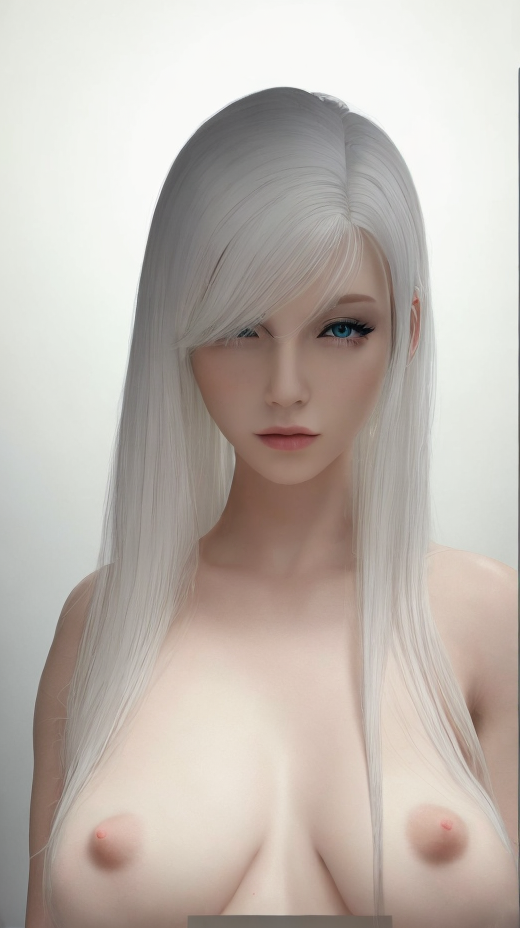

In [21]:
# img2img
input_image = load_image('/kaggle/input/raw-image/zyj.jpg')
image = pipeline(prompt=prompt,image=input_image).images[0]
image

  0%|          | 0/50 [00:00<?, ?it/s]

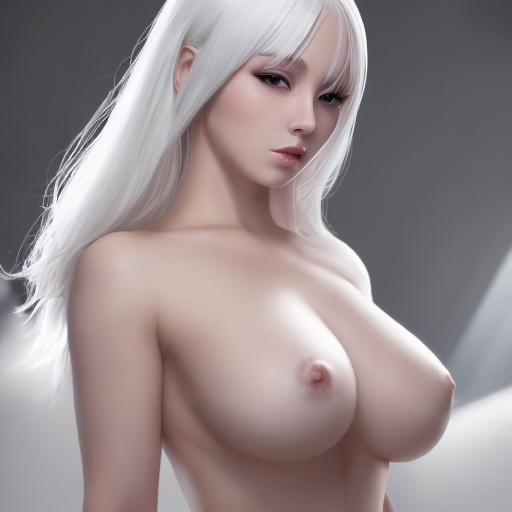

In [10]:
# text2img
prompt = "a sexy girl,whole body,white hair,detailed,8k"
image = pipeline(prompt=prompt).images[0]
image

In [ ]:
image.save('sdf.jpg')

In [ ]:
import keras_cv
import keras_core as keras
import numpy as np
import tensorflow as tf
import PIL as pil

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
input_data = tf.ones(shape=(8, 224, 224, 3))
# Pretrained backbone
model = keras_cv.models.YOLOV8Backbone.from_preset(
    "yolo_v8_xl_backbone"
)
output = model(input_data)

# Randomly initialized backbone with a custom config
model = keras_cv.models.YOLOV8Backbone(
    stackwise_channels=[128, 256, 512, 1024],
    stackwise_depth=[3, 9, 9, 3],
    include_rescaling=False,
)
output = model(input_data)


In [ ]:
input_data[0].shape

In [ ]:
plt.imshow(output)